In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import argparse
import cv2
import imutils
import tensorflow as tf
from tensorflow import keras
from imutils.contours import sort_contours
import os

In [2]:
from google.colab.patches import cv2_imshow

In [2]:
index_chars=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","A","B","C","D"
,"E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","0","1","2","3","4","5","6","7","8","9"]
nums_intances={}
path=r"C:\Users\hoang\OneDrive\Máy tính\printingcharacter\printing-character-regconition\datasets\English Alphabet Dataset"
dir_list=os.listdir(path=path)
for i in dir_list:
    path_i=os.path.join(path, i)
    dir_list_i=os.listdir(path=path_i) 
    nums_intances[i]=len(dir_list_i)


In [3]:
print(nums_intances)

{'1': 30, '10': 30, '11': 30, '12': 30, '13': 30, '14': 30, '15': 30, '16': 30, '17': 30, '18': 30, '19': 30, '2': 30, '20': 30, '21': 30, '22': 30, '23': 30, '24': 30, '25': 30, '26': 30, '27': 30, '28': 30, '29': 30, '3': 30, '30': 30, '31': 30, '32': 30, '33': 30, '34': 30, '35': 30, '36': 30, '37': 30, '38': 30, '39': 30, '4': 30, '40': 30, '41': 30, '42': 30, '43': 30, '44': 30, '45': 30, '46': 30, '47': 30, '48': 30, '49': 30, '5': 30, '50': 30, '51': 30, '52': 30, '53': 30, '54': 30, '55': 30, '56': 30, '57': 30, '58': 30, '59': 30, '6': 30, '60': 30, '61': 30, '62': 30, '7': 30, '8': 30, '9': 30}


In [5]:
##########################################
#predict 
######################################
lines=[]
result=[]
roi_number = 0
ROI_number = 0
roi2_number = 0
width=0
height=0
results=np.array([[0,0,0,0]])
image = cv2.imread('.\images\phone_text4.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# ratio=100/avg_line_height
# gray=cv2.resize(gray,(np.int(gray.shape[1]*ratio),np.int(gray.shape[0]*ratio)), interpolation = cv2.INTER_LINEAR)
image_h=gray.shape[0]
image_w=gray.shape[1]
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,12)
clone=np.copy(thresh)
# cv2.imshow(thresh)
kernel = np.ones((1,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
# cv2.imshow(img_dilation)
ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sort_contours(ctrs,"top-to-bottom")[0]
img1=255-thresh
for i, ctr in enumerate(sorted_ctrs):
  x, y, w, h = cv2.boundingRect(ctr)
  if h < np.round(image_h/100):
    continue
  roi = img1[y:y+h, x:x+w]
  # cv2.imwrite('image_{}.png'.format(ROI_number), roi)
  roi_number += 1
  cv2.rectangle(clone,(x,y),( x + w, y + h ),(90,0,255),5)
  # cv2.waitKey(0)
  # cv2.imshow(roi)
  # cv2.waitKey(0)
  lines.append(roi)
# cv2.imshow(clone)
for line in lines:
  print(line.shape)
  line_h=line.shape[0]
  gray2=line
  thresh2 = cv2.adaptiveThreshold(gray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,8)
  # cv2.imshow(thresh2)
  kernel2 = np.ones((1,20), np.uint8)
  img_dilation2 = cv2.dilate(thresh2, kernel2, iterations=1)
  ctrs2, hier2 = cv2.findContours(img_dilation2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  sorted_ctrs2 = sort_contours(ctrs2)[0]
  words_in_line=[]
  img2=255-thresh2
  roi2_number=0
  for i, ctr2 in enumerate(sorted_ctrs2):
    x, y, w, h = cv2.boundingRect(ctr2)
    if h<np.round(30):
      continue
    roi2 = img2[y:y+h, x:x+w]
    print(roi2.shape)
    roi2_number += 1
    # cv2.imshow(roi2)
    words_in_line.append(roi2)

################################################
  print(len(words_in_line))
  for word in words_in_line:
    original_h=[]
    original_w=[]
    copyROIs=[]
    original = word.copy()
    gray3=word
    thresh3 = cv2.adaptiveThreshold(gray3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,20)
    imgs=[]
    cnts3 = cv2.findContours(thresh3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts3 = cnts3[0] if len(cnts3) == 2 else cnts3[1]
    sorted_cnts3 = sort_contours(cnts3)[0]
    for c in sorted_cnts3:
      x,y,w,h = cv2.boundingRect(c)
      if h >= np.round(line_h/5) and h <= 120:
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        original_h.append(ROI.shape[0])
        original_w.append(ROI.shape[1])
        
        ROI = cv2.resize(ROI, (60,60), interpolation = cv2.INTER_LINEAR)
        print(ROI.shape)
        cv2.imshow("a",ROI)
        if(cv2.waitKey(33) == 2490368):
          cv2.destroyAllWindows()
        # ROI = cv2.cvtColor(ROI,cv2.COLOR_BGR2GRAY)
        a=input()
        if a!="]":
          ind=index_chars.index(a)+1
          count=nums_intances[str(ind)]
          count+=1
          nums_intances[str(ind)]=count
          cv2.imwrite(r'C:\Users\hoang\OneDrive\Máy tính\printingcharacter\printing-character-regconition\datasets\English Alphabet Dataset/{0}/{1}.png'.format(ind,count), ROI)
        

(73, 264)
(73, 184)
1
(60, 60)


ValueError: '' is not in list

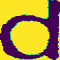

In [ ]:
a=cv2.imread("/content/drive/MyDrive/emnist/English Alphabet Dataset/4/31.png")
cv2_imshow(a)

In [ ]:
##########################################
#predict 
######################################
lines=[]
result=[]
roi_number = 0
ROI_number = 0
roi2_number = 0
width=0
height=0
results=np.array([[0,0,0,0]])
image = cv2.imread('/content/drive/MyDrive/images/phone_text4.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# ratio=100/avg_line_height
# gray=cv2.resize(gray,(np.int(gray.shape[1]*ratio),np.int(gray.shape[0]*ratio)), interpolation = cv2.INTER_LINEAR)

thresh2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,12)
clone=np.copy(thresh2)
# cv2.imshow(thresh)
kernel = np.ones((1,20), np.uint8)
img_dilation2 = cv2.dilate(thresh2, kernel, iterations=1)
ctrs2, hier2 = cv2.findContours(img_dilation2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs2 = sort_contours(ctrs2)[0]
words_in_text=[]
img2=255-thresh2
roi2_number=0
for i, ctr2 in enumerate(sorted_ctrs2):
  x, y, w, h = cv2.boundingRect(ctr2)
  if h<np.round(30):
    continue
  roi2 = img2[y:y+h, x:x+w]
  print(roi2.shape)
  roi2_number += 1
  
  words_in_text.append(roi2)
for word in words_in_text:  
  word_height=word.shape[0]
  cv2_imshow(word)
  # img1=255-thresh
  copyROIs=[]
  original = word.copy()
  gray3=word
  thresh3 = cv2.adaptiveThreshold(gray3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,20)
  imgs=[]
  cnts3 = cv2.findContours(thresh3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts3 = cnts3[0] if len(cnts3) == 2 else cnts3[1]
  sorted_cnts3 = sort_contours(cnts3)[0]
  for c in sorted_cnts3:
    x,y,w,h = cv2.boundingRect(c)
    if h >= np.round(word_height/5) and h <= 120:
      cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
      ROI = original[y:y+h, x:x+w]
        
      ROI = cv2.resize(ROI, (60,60), interpolation = cv2.INTER_LINEAR)
    # print(ROI.shape)
      cv2_imshow(ROI)
    # ROI = cv2.cvtColor(ROI,cv2.COLOR_BGR2GRAY)
      a=input()
      if a!="]":
        ind=index_chars.index(a)+1
        count=nums_intances[str(ind)]
        count+=1
        nums_intances[str(ind)]=count
        cv2.imwrite('/content/drive/MyDrive/emnist/English Alphabet Dataset/{0}/{1}.png'.format(ind,count), ROI)
        # cv2.imwrite('{0}.png'.format(count), ROI)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = cv2.imread('/content/31.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [ ]:
path = '/content/drive/MyDrive/emnist/English Alphabet Dataset'
path_i=os.path.join(path, '15')
print(path_i)
img_list=os.listdir(path_i)
for j in img_list:
  # an_image = PIL.Image.open(os.path.join(path_i, j))
    # an_image.thumbnail((20,20), Image.ANTIALIAS)
    # image_sequence = an_image.getdata()
  image = cv2.imread(os.path.join(path_i, j))
    # image=cv2.resize(image,(60,60))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  print(j)
  thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,8)
  cv2_imshow(thresh)